In [1]:
import pandas as pd
import numpy as np

In [2]:
auto = pd.read_csv('Auto.csv')

In [3]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
np.unique(auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [5]:
# Convert the '?' to NaN
auto = pd.read_csv('Auto.csv', na_values=['?'])

In [6]:
np.unique(auto['horsepower'])

array([ 46.,  48.,  49.,  52.,  53.,  54.,  58.,  60.,  61.,  62.,  63.,
        64.,  65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,
        98., 100., 102., 103., 105., 107., 108., 110., 112., 113., 115.,
       116., 120., 122., 125., 129., 130., 132., 133., 135., 137., 138.,
       139., 140., 142., 145., 148., 149., 150., 152., 153., 155., 158.,
       160., 165., 167., 170., 175., 180., 190., 193., 198., 200., 208.,
       210., 215., 220., 225., 230.,  nan])

In [7]:
auto.shape

(397, 9)

In [8]:
# Drop rows containing one or more NaNs
auto_new = auto.dropna()
auto_new.shape

(392, 9)

In [9]:
auto_new.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


## Quantitative predictors
- mpg (miles per galon)
- displacement
- horsepower
- weight
- acceleration
- year

## Qualitative predictors
- name
- origin (it can be either 1, 2 or 3)

## Quantitative or Qualitative
- cylinders (can be 3, 4, 5, 6 or 8) can be treated as categorical
- origin (can be 1, 2 or 3) can be treated as categorical

In [10]:
np.unique(auto_new['cylinders'])
np.unique(auto_new['origin'])

array([1, 2, 3], dtype=int64)

## Range of each quantitative predictor

In [11]:
def min_max_col(table, predictor):
    # Computes the minimum and maximum of a 
    # given column (predictor) from a dataframe (table)
    return np.min(table[predictor]), np.max(table[predictor])

#auto_new.columns
for predictor in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']:
    min_p, max_p = min_max_col(auto_new, predictor)
    #print('{} range: ({}, {})'.format(predictor, min_p, max_p))
    print('{} range:'.format(predictor.title()) + '({}, {})'.format(min_p, max_p).rjust(30-len(predictor), '_'))

Mpg range:________________(9.0, 46.6)
Cylinders range:_______________(3, 8)
Displacement range:_____(68.0, 455.0)
Horsepower range:_______(46.0, 230.0)
Weight range:____________(1613, 5140)
Acceleration range:_______(8.0, 24.8)
Year range:__________________(70, 82)
Origin range:__________________(1, 3)


## Mean and Standard deviation of quantitative predictors

In [12]:
for predictor in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']:
    print('{}: Mean={:.2f}, Std={:.2f}'.format(predictor.title(), np.mean(auto_new[predictor]), np.std(auto_new[predictor])))

Mpg: Mean=23.45, Std=7.80
Cylinders: Mean=5.47, Std=1.70
Displacement: Mean=194.41, Std=104.51
Horsepower: Mean=104.47, Std=38.44
Weight: Mean=2977.58, Std=848.32
Acceleration: Mean=15.54, Std=2.76
Year: Mean=75.98, Std=3.68
Origin: Mean=1.58, Std=0.80


In [13]:
# Removing 10th through 85th obervations
auto_smaller = auto_new.loc[(auto_new.index < 10) | (auto_new.index > 85)]
auto_smaller.head(14)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [14]:
for predictor in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']:
    min_p, max_p = min_max_col(auto_smaller, predictor)
    print('{} range:'.format(predictor.title()) + '({}, {})'.format(min_p, max_p).rjust(30-len(predictor), '_'))

print()
for predictor in ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']:
    print('{}: Mean={:.2f}, Std={:.2f}'.format(predictor.title(), np.mean(auto_smaller[predictor]), np.std(auto_smaller[predictor])))

Mpg range:_______________(11.0, 46.6)
Cylinders range:_______________(3, 8)
Displacement range:_____(68.0, 455.0)
Horsepower range:_______(46.0, 230.0)
Weight range:____________(1649, 4997)
Acceleration range:_______(8.5, 24.8)
Year range:__________________(70, 82)
Origin range:__________________(1, 3)

Mpg: Mean=24.37, Std=7.86
Cylinders: Mean=5.38, Std=1.66
Displacement: Mean=187.88, Std=100.01
Horsepower: Mean=101.00, Std=35.95
Weight: Mean=2938.85, Std=810.36
Acceleration: Mean=15.70, Std=2.72
Year: Mean=77.12, Std=3.12
Origin: Mean=1.60, Std=0.82


In [17]:
auto_new.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


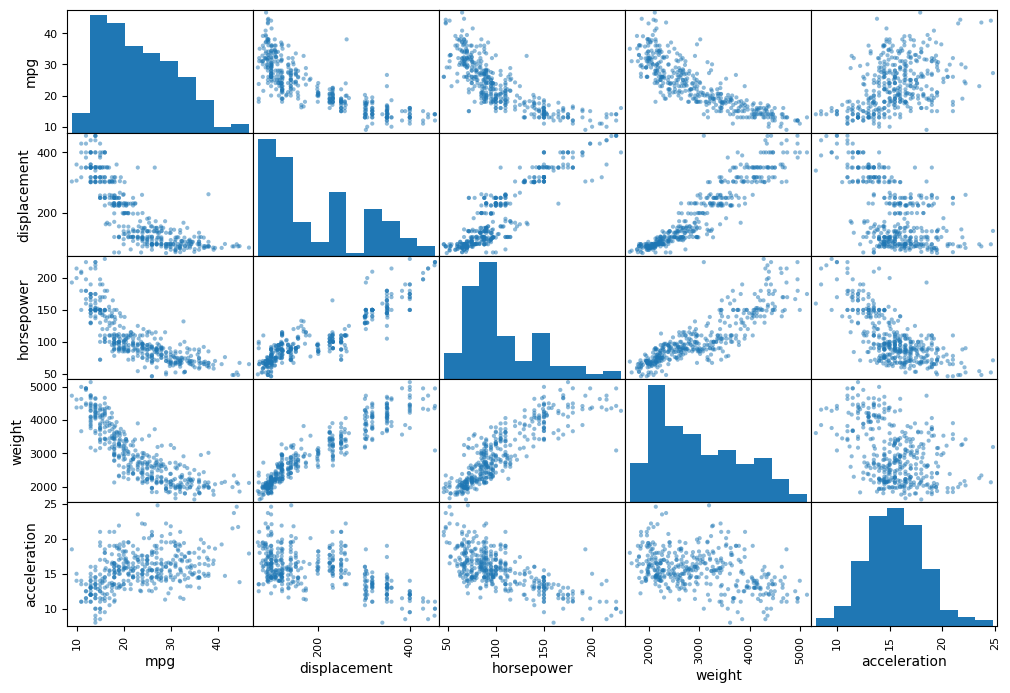

In [19]:
# Explore dataset from auto_new graphically
columns_to_plot = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
pd.plotting.scatter_matrix(auto_new[columns_to_plot], figsize=(12,8));

## First conclusion about the plots
We can see some clear relashionships between some of the predictors. For example, we can see that `displacement` monotonically increases with `horsepower` and `weight`, while it decreases when `mpg` increases.

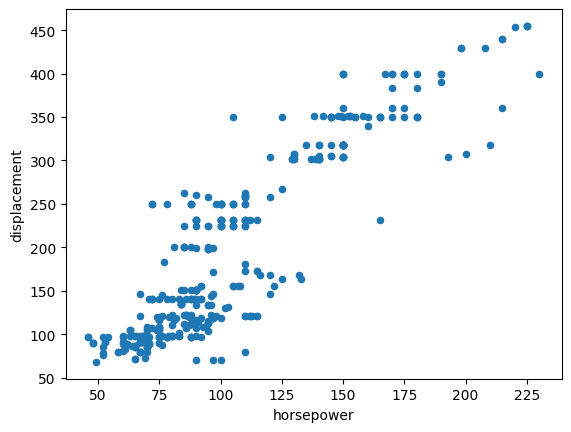

In [22]:
# Displacement vs horsepower
auto_new.plot.scatter('horsepower', 'displacement');

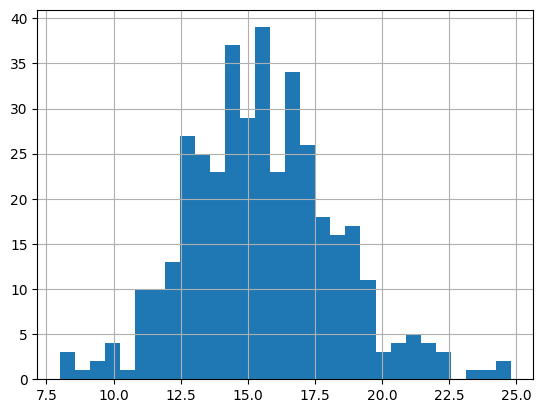

In [26]:
# The histogram for acceleration looks much like a perfect gaussian
auto_new['acceleration'].hist(bins=30);

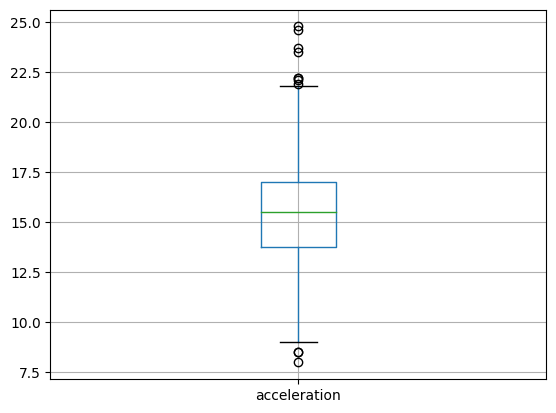

In [27]:
auto_new.boxplot(column='acceleration');

## Predicting mpg (gas mileage)
If we wish to predict `mpg`, we can use the `displacement`, `horsepower` and `weight`, because there is a clear relashionship between them.

However, we cannot use `acceleration` because the relashionship between this and `mpg` is not clear when looking at the scatter plot.

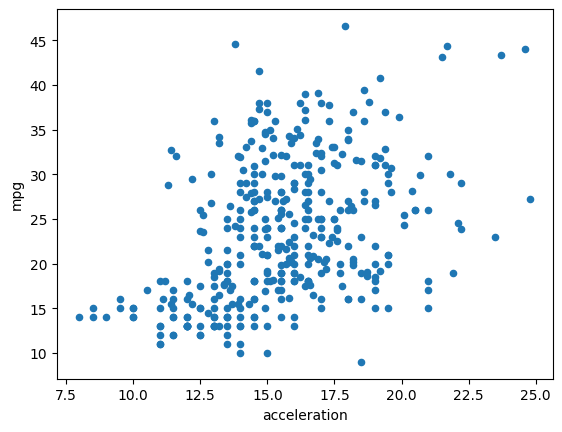

In [28]:
auto_new.plot.scatter('acceleration', 'mpg');